<a href="https://colab.research.google.com/github/KubraErensoy/MtaTurnstileData/blob/main/mta_yazay%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


%matplotlib inline

In [2]:
df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210626.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210619.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210612.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210605.txt')
df5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200627.txt')
df6 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200620.txt')
df7 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200613.txt')
df8 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200606.txt')
df9 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt')
df10 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt')
df11 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt')
df12 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt')
df13 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180623.txt')
df14 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180616.txt')
df15 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180609.txt')
df16 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180602.txt')


In [3]:
mta = pd.concat([df1, df2, df3, df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16])


***EXPLORING THE DATASET***

In [4]:
mta.head(4)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/19/2021,00:00:00,REGULAR,7589159,2594185
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/19/2021,04:00:00,REGULAR,7589165,2594190
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/19/2021,08:00:00,REGULAR,7589174,2594207
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/19/2021,12:00:00,REGULAR,7589214,2594253


In [5]:
#The total number of rows and columns in the data set
mta.shape

(3276100, 11)

In [6]:
# '.info' Looking at Data Types in Columns and checking for nulls
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276100 entries, 0 to 196635
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

-  Data has only object and integer values.
-  No variable column has null/missing values

In [7]:
mta.describe()

,ENTRIES,EXITS
count,3.276100e+06,3.276100e+06
mean,4.189457e+07,3.412185e+07
std,2.153507e+08,1.953370e+08
min,0.000000e+00,0.000000e+00
25%,3.060300e+05,1.344410e+05
50%,1.957080e+06,1.141034e+06
75%,6.542352e+06,4.464890e+06
max,2.147417e+09,2.124038e+09


### ***CLEANNING AND PREPARATION DATA***


In [8]:
# see column headings
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [9]:
# Eliminate spaces at columns names

mta.columns = mta.columns.str.strip()
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [10]:
#rename column headers
mta.rename(columns={'C/A'    :'ca',
                    'UNIT'    :'unit',
                    'SCP'     :'scp', 
                    'STATION' :'station',
                    'LINENAME':'linename',
                    'DIVISION':'division', 
                    'DATE'    :'date', 
                    'TIME'    :'time',
                    'DESC'    :'desc', 
                    'ENTRIES' :'entries',
                    'EXITS'   :'exits'
                    },inplace=True)

In [11]:
mta.columns

Index(['ca', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

In [12]:
#drop fonksiyonu ile division ve linename sütünlarını çıkardık
mta=mta.drop(["division","linename"],axis=1)#axis= 1 sütun manasında
mta.head(2)

,ca,unit,scp,station,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,06/19/2021,00:00:00,REGULAR,7589159,2594185
1,A002,R051,02-00-00,59 ST,06/19/2021,04:00:00,REGULAR,7589165,2594190


In [13]:
# Create a datetime column with datetime object
# Convert date data to datetime object
 

mta['datetime'] = mta["date"]+ " " + mta["time"]
mta['datetime'] = pd.to_datetime(mta['datetime'], format='%m/%d/%Y %H:%M:%S')

mta['yeardate']=pd.DatetimeIndex(mta['date']).year


# Create a day column
mta['day'] = mta['datetime'].dt.day_name()


# Create turnstile column as proxy for unique identifier
mta['turnstile']= mta['station']+'-'+mta['ca']+'-'+mta['unit']+'-'+mta['scp']

mta.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276100 entries, 0 to 196635
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   ca         object        
 1   unit       object        
 2   scp        object        
 3   station    object        
 4   date       object        
 5   time       object        
 6   desc       object        
 7   entries    int64         
 8   exits      int64         
 9   datetime   datetime64[ns]
 10  yeardate   int64         
 11  day        object        
 12  turnstile  object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 349.9+ MB


In [14]:
mta.head(5)

,ca,unit,scp,station,date,time,desc,entries,exits,datetime,yeardate,day,turnstile
0,A002,R051,02-00-00,59 ST,06/19/2021,00:00:00,REGULAR,7589159,2594185,2021-06-19 00:00:00,2021,Saturday,59 ST-A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,06/19/2021,04:00:00,REGULAR,7589165,2594190,2021-06-19 04:00:00,2021,Saturday,59 ST-A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,06/19/2021,08:00:00,REGULAR,7589174,2594207,2021-06-19 08:00:00,2021,Saturday,59 ST-A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,06/19/2021,12:00:00,REGULAR,7589214,2594253,2021-06-19 12:00:00,2021,Saturday,59 ST-A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,06/19/2021,16:00:00,REGULAR,7589300,2594278,2021-06-19 16:00:00,2021,Saturday,59 ST-A002-R051-02-00-00


In [15]:
mta['station'].nunique()


379

In [16]:
mta['station'].value_counts().sort_values(ascending=False).head(10)


34 ST-PENN STA     67279
FULTON ST          64834
GRD CNTRL-42 ST    49979
23 ST              48699
86 ST              40028
CANAL ST           39078
CHAMBERS ST        36739
34 ST-HERALD SQ    36425
59 ST              34967
42 ST-PORT AUTH    34341
Name: station, dtype: int64

### ***DATA VISUALIZATION***

In [17]:
def plotBar(variable,n=7):
   
    mta_=mta[variable]
    mta_count=mta_.value_counts()
    mta_count=mta_count[:n]
    plt.figure()
    plt.bar(mta_count.index,mta_count,color="green")
    plt.xticks(mta_count.index,mta_count.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans",fontweight="bold")
    plt.title("Data Frequency - {}".format(variable),fontweight="bold")
    plt.show()
    print("{}:\n {}".format(variable,mta_count))

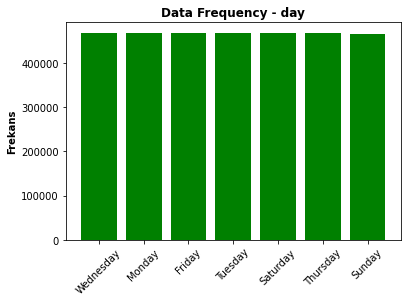

day:
 Wednesday    468658
Monday       468567
Friday       468463
Tuesday      468033
Saturday     467992
Thursday     467863
Sunday       466524
Name: day, dtype: int64


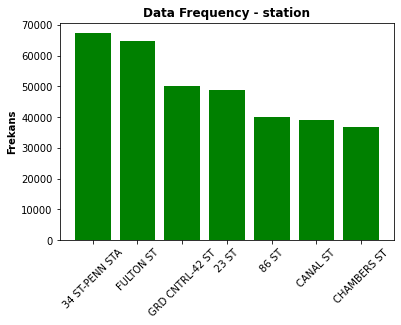

station:
 34 ST-PENN STA     67279
FULTON ST          64834
GRD CNTRL-42 ST    49979
23 ST              48699
86 ST              40028
CANAL ST           39078
CHAMBERS ST        36739
Name: station, dtype: int64


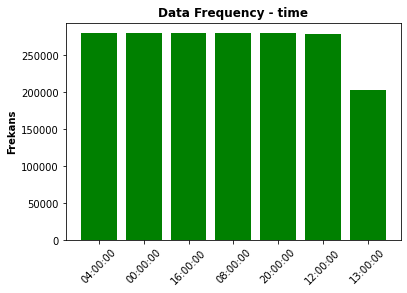

time:
 04:00:00    279721
00:00:00    279655
16:00:00    279654
08:00:00    279629
20:00:00    279621
12:00:00    279503
13:00:00    203790
Name: time, dtype: int64


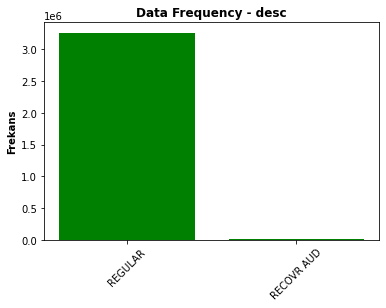

desc:
 REGULAR       3264840
RECOVR AUD      11260
Name: desc, dtype: int64


In [18]:
categorical_variable=["day","station","time","desc"]
for i in categorical_variable:
    plotBar(i)

In [19]:
turnstiles_daily = (mta.groupby(["ca", "unit", "scp", "station", "date","day","time",'yeardate'],as_index=False).entries.first())


In [20]:
#Calculate the daily entries by using each day's entries to minus the previous date
turnstiles_daily[['date_prev', 'entries_prev']] = turnstiles_daily.groupby(['ca','unit','scp','station'])['date','entries'].shift(1)

#dropping top row of NaN's:
turnstiles_daily.dropna(subset=["date_prev"], axis=0, inplace=True)

# Where is the counter going the wrong way?
turnstiles_daily[turnstiles_daily["entries"] < turnstiles_daily["entries_prev"]].head()

# Fixing counter
def get_daily_counts(df, max_counter = 1500000):
    counter = df["entries_prev"] - df["entries"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        return 0
    return counter


# finally adding our daily entries column!
turnstiles_daily["daily_entries"] = turnstiles_daily.apply(get_daily_counts, axis = 1,max_counter=40000)

turnstiles_daily.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,ca,unit,scp,station,date,day,time,yeardate,entries,date_prev,entries_prev,daily_entries
1,A002,R051,02-00-00,59 ST,05/26/2018,Saturday,04:00:00,2018,6633916,05/26/2018,6633898.0,18.0
2,A002,R051,02-00-00,59 ST,05/26/2018,Saturday,08:00:00,2018,6633928,05/26/2018,6633916.0,12.0
3,A002,R051,02-00-00,59 ST,05/26/2018,Saturday,12:00:00,2018,6634015,05/26/2018,6633928.0,87.0
4,A002,R051,02-00-00,59 ST,05/26/2018,Saturday,16:00:00,2018,6634173,05/26/2018,6634015.0,158.0
5,A002,R051,02-00-00,59 ST,05/26/2018,Saturday,20:00:00,2018,6634367,05/26/2018,6634173.0,194.0


In [21]:
# Visualize the median of daily entries to obsevve the patterns of this metric

turnstiles_daily_copy = turnstiles_daily.groupby("yeardate")["daily_entries"].median().reset_index()

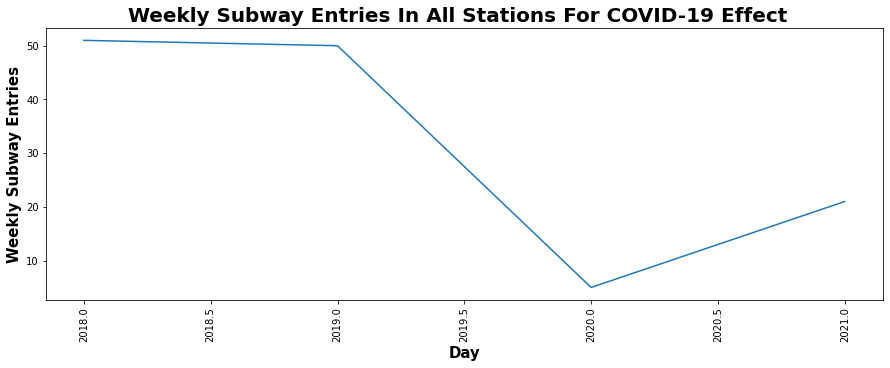

In [22]:
plt.figure(figsize = (15,5))
plt.plot(turnstiles_daily_copy.yeardate, turnstiles_daily_copy.daily_entries)
plt.title("Weekly Subway Entries In All Stations For COVID-19 Effect  ",weight="bold",c="black",fontsize=20)
plt.xlabel("Day",weight="bold",c="black",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Weekly Subway Entries",weight="bold",c="black",fontsize=15);

In [23]:
ca_unit_station_daily = turnstiles_daily.groupby(["ca", "unit","station", "date","yeardate","day"])[['daily_entries']].sum().reset_index()
ca_unit_station_daily.head()

,ca,unit,station,date,yeardate,day,daily_entries
0,A002,R051,59 ST,05/26/2018,2018,Saturday,4982.0
1,A002,R051,59 ST,05/27/2018,2018,Sunday,5306.0
2,A002,R051,59 ST,05/28/2018,2018,Monday,5609.0
3,A002,R051,59 ST,05/29/2018,2018,Tuesday,12526.0
4,A002,R051,59 ST,05/29/2021,2021,Saturday,2103.0


Text(0.5, 1.0, 'COVID-19 Effect on MTA Traffic')

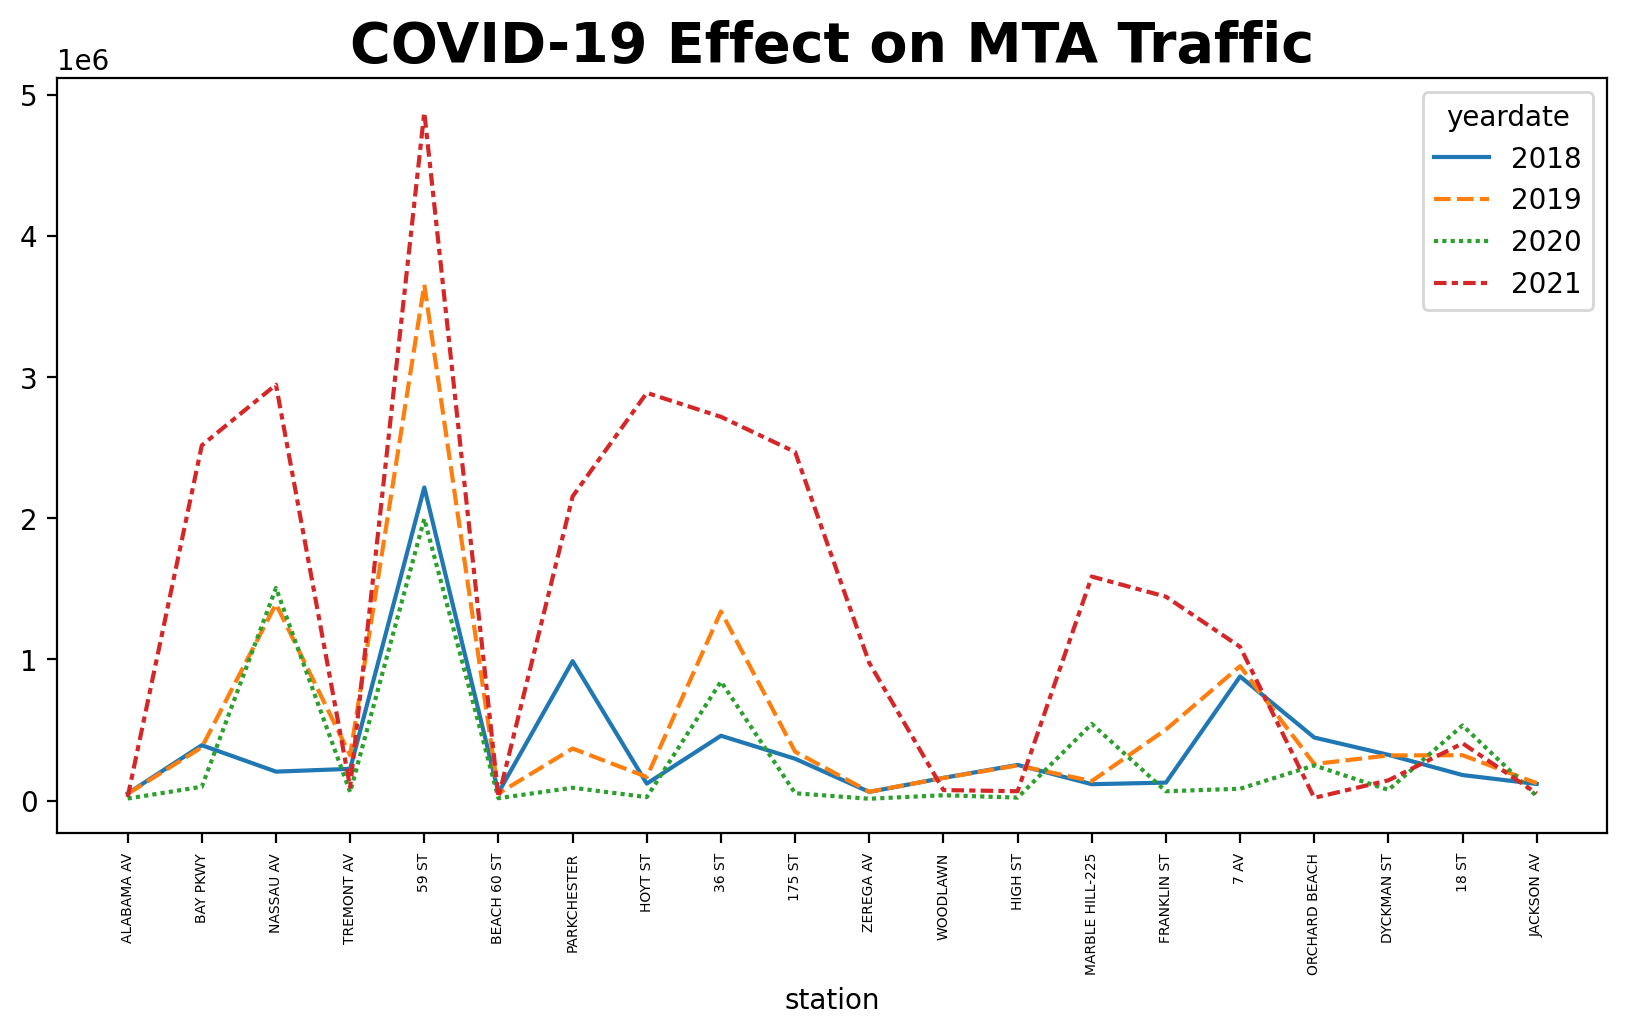

In [24]:
mta_stations_by_year = ca_unit_station_daily.groupby(['station','yeardate']).sum()
mta_stations_by_year = mta_stations_by_year.reset_index()
mta_stations_by_year

mta_stations_year_pivot = mta_stations_by_year.pivot('station','yeardate','daily_entries').sample(20)

plt.figure(figsize=[10,5], dpi=200)
sns.lineplot(data=mta_stations_year_pivot)
plt.xticks(rotation=90, fontsize=5)
plt.title("COVID-19 Effect on MTA Traffic", fontweight='bold', fontsize=20)

In [25]:
station_daily = turnstiles_daily.groupby(["station","date","day",])[['daily_entries']].sum().reset_index()
station_daily.head()

,station,date,day,daily_entries
0,1 AV,05/26/2018,Saturday,12813.0
1,1 AV,05/27/2018,Sunday,13287.0
2,1 AV,05/28/2018,Monday,12572.0
3,1 AV,05/29/2018,Tuesday,20723.0
4,1 AV,05/29/2021,Saturday,4343.0


In [26]:
top10_stations = (station_daily.groupby(['station'])['daily_entries'].sum()
                   .reset_index()
                   .sort_values(by='daily_entries',ascending=False) 
                   .station.head(10))

In [27]:
top10_stations

315       PATH NEW WTC
233    GRD CNTRL-42 ST
279    METS-WILLETS PT
180        CHAMBERS ST
226          FULTON ST
61      34 ST-PENN STA
21     161/YANKEE STAD
239           HARRISON
192       CORTLANDT ST
13               14 ST
Name: station, dtype: object

In [28]:
station_daily_top10 =station_daily[station_daily['station']
                    .isin(top10_stations)].sort_values(by = 'daily_entries', ascending = False)

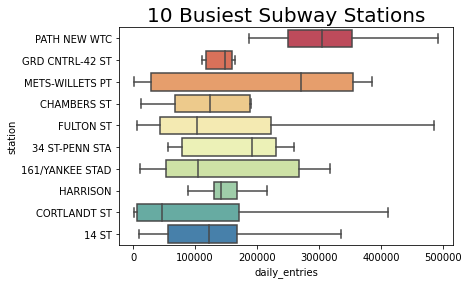

In [29]:
sns.boxplot(x='daily_entries', y='station', data=station_daily_top10, 
            order = top10_stations,palette="Spectral",
            showfliers = False).set_title('10 Busiest Subway Stations',
                                          size = 20);

In [30]:
station_daily_top10

,station,date,day,daily_entries
26029,GRD CNTRL-42 ST,06/11/2021,Friday,710249.0
26069,GRD CNTRL-42 ST,06/21/2021,Monday,702558.0
26061,GRD CNTRL-42 ST,06/19/2021,Saturday,684133.0
26065,GRD CNTRL-42 ST,06/20/2021,Sunday,682034.0
26082,GRD CNTRL-42 ST,06/25/2021,Friday,675567.0
...,...,...,...,...
21444,CORTLANDT ST,06/13/2020,Saturday,1390.0
21416,CORTLANDT ST,06/06/2020,Saturday,1269.0
21448,CORTLANDT ST,06/14/2020,Sunday,1236.0
21476,CORTLANDT ST,06/21/2020,Sunday,1228.0


In [31]:
# Function to get the unique DAY + DATE combination
def get_day(x):
    return f"{x.date()}_{x.day_name()}"

In [32]:
mta['day_date'] = mta['datetime'].apply(get_day)

In [33]:
mta_grouped = mta.groupby(['station','unit','scp','day','datetime','day_date'])['entries','exits'].agg(['max','min'])
mta_grouped.sort_values(('entries','max'),ascending=False).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


station  unit       scp       day            datetime  \
                                                                    
0          HEWES ST  R352  00-00-00  Saturday 2021-05-29 01:00:00   
1          HEWES ST  R352  00-00-00  Saturday 2021-05-29 05:00:00   
2          HEWES ST  R352  00-00-00  Saturday 2021-05-29 09:00:00   
3          HEWES ST  R352  00-00-00  Saturday 2021-05-29 13:00:00   
4          HEWES ST  R352  00-00-00  Saturday 2021-05-29 17:00:00   
...             ...   ...       ...       ...                 ...   
3276071  OCEAN PKWY  R264  01-05-01   Tuesday 2021-06-08 16:00:00   
3276072  OCEAN PKWY  R264  01-05-01   Tuesday 2021-06-08 20:00:00   
3276073  OCEAN PKWY  R264  01-05-01   Tuesday 2021-06-15 00:00:00   
3276074  OCEAN PKWY  R264  01-05-01   Tuesday 2021-06-15 04:00:00   
3276075  SMITH-9 ST  R270  00-05-01  Saturday 2019-06-08 16:00:00   

                    day_date     entries                  exits             
                                     max         min        max        min  
0        2021-05-29_Saturday  2147416896  2147416896  671154389  671154389  
1        2021-05-29_Saturday  2147416888  2147416888  671154394  671154394  
2        2021-05-29_Saturday  2147416857  2147416857  671154413  671154413  
3        2021-05-29_Saturday  2147416790  2147416790  671154446  671154446  
4        2021-05-29_Saturday  2147416714  2147416714  671154475  671154475  
...                      ...         ...         ...        ...        ...  
3276071   2021-06-08_Tuesday           0           0        880        880  
3276072   2021-06-08_Tuesday           0           0        880        880  
3276073   2021-06-15_Tuesday           0           0        880        880  
3276074   2021-06-15_Tuesday           0           0        880        880  
3276075  2019-06-08_Saturday           0           0        149        149  

[3276076 rows x 10 columns]

In [34]:
# Group the sorted data and calculate ENTRIES & EXISTS for each element to create a summary dataframe
mta_entries = mta.groupby(['station','unit','scp','day','day_date','date']).entries.max() - mta.groupby(['station','unit','scp','day','day_date','date']).entries.min()
mta_entries = mta_entries.reset_index()

mta_exits = mta.groupby(['station','unit','scp','day','day_date','date']).exits.max() - mta.groupby(['station','unit','scp','day','day_date','date']).exits.min()
mta_exits = mta_exits.reset_index()

mta_entry_exit = pd.merge(left=mta_entries,right=mta_exits,on=['station','unit','scp','day','day_date','date'])
mta_entry_exit.isnull().sum()

mta_entry_exit.columns = ['station','unit','scp','day','day_date','date','entries_diff','exits_diff']
mta_entry_exit

,station,unit,scp,day,day_date,date,entries_diff,exits_diff
0,1 AV,R248,00-00-00,Friday,2018-06-01_Friday,06/01/2018,3624,4476
1,1 AV,R248,00-00-00,Friday,2018-06-08_Friday,06/08/2018,3660,4335
2,1 AV,R248,00-00-00,Friday,2018-06-15_Friday,06/15/2018,3482,3965
3,1 AV,R248,00-00-00,Friday,2018-06-22_Friday,06/22/2018,3644,3948
4,1 AV,R248,00-00-00,Friday,2019-06-07_Friday,06/07/2019,3527,3680
...,...,...,...,...,...,...,...,...
545635,ZEREGA AV,R326,00-05-01,Wednesday,2020-06-24_Wednesday,06/24/2020,0,0
545636,ZEREGA AV,R326,00-05-01,Wednesday,2021-06-02_Wednesday,06/02/2021,0,0
545637,ZEREGA AV,R326,00-05-01,Wednesday,2021-06-09_Wednesday,06/09/2021,0,0
545638,ZEREGA AV,R326,00-05-01,Wednesday,2021-06-16_Wednesday,06/16/2021,0,0


In [35]:
mta_entry_exit['traffic'] = mta_entry_exit['entries_diff'] + mta_entry_exit['exits_diff']


In [36]:
mta_entry_exit.sort_values('traffic',ascending=False).head(30)


,station,unit,scp,day,day_date,date,entries_diff,exits_diff,traffic
42515,167 ST,R104,00-00-00,Friday,2019-06-14_Friday,06/14/2019,1819016355,1821590739,3640607094
58004,190 ST,R280,00-00-00,Sunday,2018-06-10_Sunday,06/10/2018,1431687995,1835851775,3267539770
37722,161/YANKEE STAD,R195,00-00-00,Monday,2020-06-22_Monday,06/22/2020,1627398252,1627443437,3254841689
263872,CANAL ST,R320,00-00-02,Monday,2018-06-18_Monday,06/18/2018,2113959893,620812492,2734772385
80286,3 AV-149 ST,R053,00-00-00,Thursday,2018-06-07_Thursday,06/07/2018,1253344816,1470647814,2723992630
80622,3 AV-149 ST,R053,00-00-03,Thursday,2018-06-07_Thursday,06/07/2018,1953723915,707413666,2661137581
80323,3 AV-149 ST,R053,00-00-00,Wednesday,2019-06-19_Wednesday,06/19/2019,1169826812,1353646638,2523473450
81219,3 AV-149 ST,R053,01-00-02,Wednesday,2019-06-19_Wednesday,06/19/2019,1061120349,1136398253,2197518602
57859,183 ST,R275,00-00-03,Monday,2018-06-04_Monday,06/04/2018,1570898050,401087858,1971985908
330305,FORDHAM RD,R112,00-00-02,Monday,2021-06-07_Monday,06/07/2021,668499297,1169855658,1838354955


### **DETECTING & TREATING OUTLIERS**

In [37]:
mta_entry_exit['traffic'].describe()

count    5.456400e+05
mean     7.050648e+04
std      1.241137e+07
min      0.000000e+00
25%      1.740000e+02
50%      6.250000e+02
75%      1.545000e+03
max      3.640607e+09
Name: traffic, dtype: float64

In [38]:
mta_entry_exit.drop(mta_entry_exit[mta_entry_exit['traffic'] > 10000].index, inplace=True)
mta_entry_exit.drop(mta_entry_exit[mta_entry_exit['traffic'] == 0].index, inplace=True)

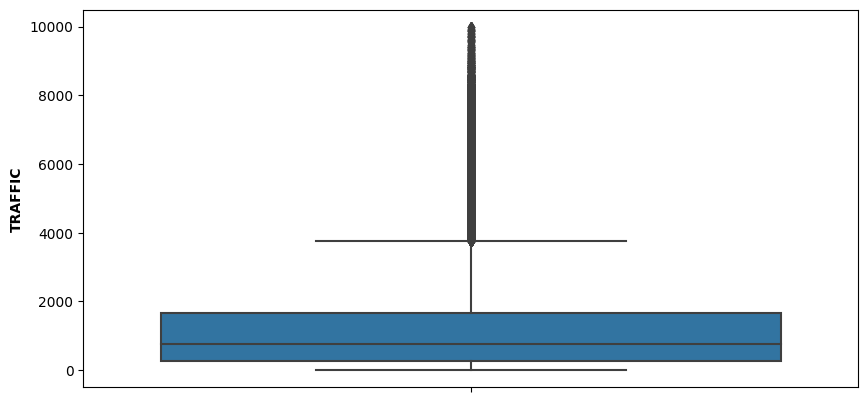

In [39]:
plt.figure(figsize=[10,5], dpi=100)
ax = sns.boxplot(y=mta_entry_exit["traffic"])
plt.ylabel("TRAFFIC",fontsize=10,fontweight="bold")
plt.show()

In [40]:
mta_entry_exit['traffic'].quantile(0.9)

2945.0

In [41]:

mta_entry_exit.drop(mta_entry_exit[mta_entry_exit['traffic'] > 2945].index, inplace=True)


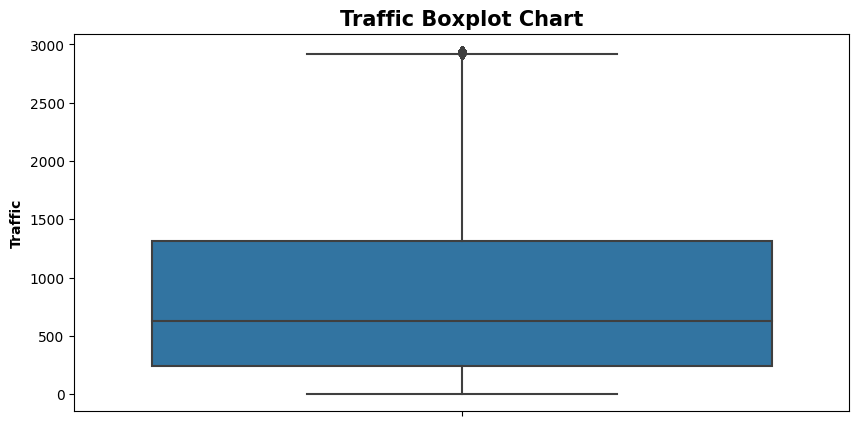

In [42]:
plt.figure(figsize=[10,5], dpi=100)
ax = sns.boxplot(y=mta_entry_exit["traffic"])
plt.ylabel("Traffic",fontsize=10,fontweight="bold")
plt.title("Traffic Boxplot Chart",fontsize=15,fontweight="bold")
plt.show()

In [43]:
mta_top_10 = mta_entry_exit.groupby('station').sum().sort_values('traffic', ascending=False).head(10)
mta_top_10 = mta_top_10.reset_index()
print(mta_top_10)   

           station  entries_diff  exits_diff  traffic
0   34 ST-PENN STA       4384466     4267776  8652242
1        FULTON ST       3142057     2740390  5882447
2            23 ST       3063887     2765488  5829375
3            86 ST       3017464     2389775  5407239
4            59 ST       2581059     2498520  5079579
5         CANAL ST       2591002     2442992  5033994
6           125 ST       2632430     2307924  4940354
7  GRD CNTRL-42 ST       2161642     2398419  4560061
8  34 ST-HERALD SQ       2042309     2455834  4498143
9  42 ST-PORT AUTH       2420556     1773405  4193961


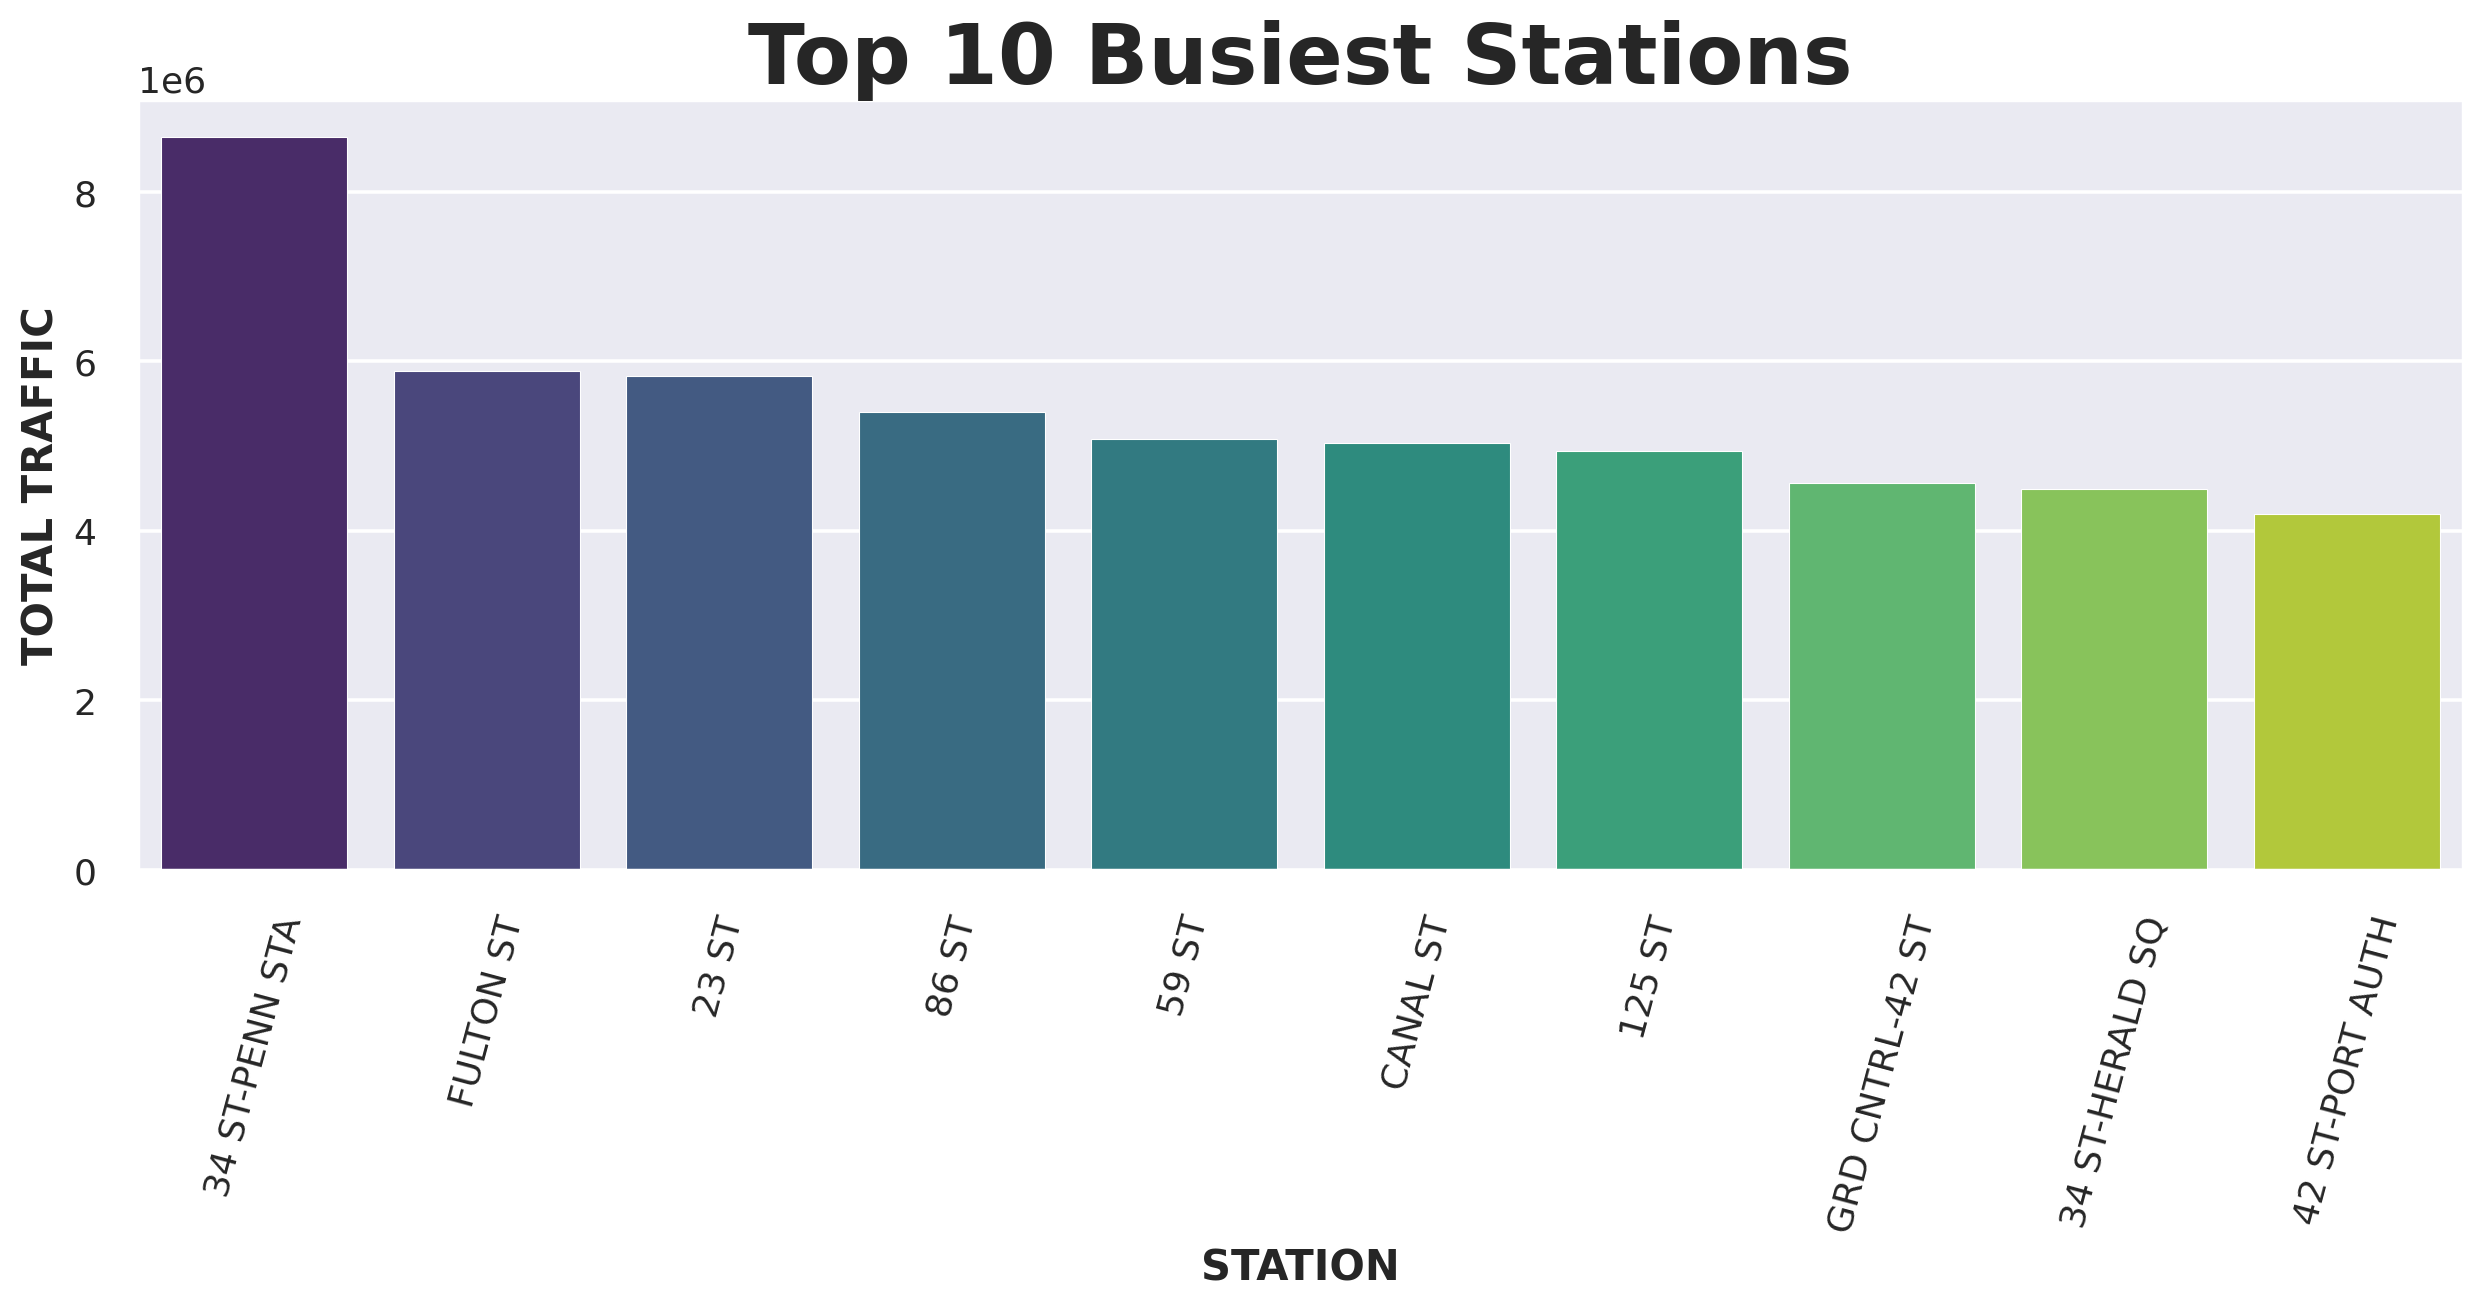

In [70]:
plt.figure(figsize=[15,5], dpi=200)
ax = sns.barplot(x = 'station',y = 'traffic',data = mta_top_10,palette=("viridis")
)
plt.title('Top 10 Busiest Stations', weight="bold", fontsize=30)
plt.ylabel('TOTAL TRAFFIC',fontsize=15,fontweight="bold")
plt.xlabel('STATION',fontsize=15,fontweight="bold")
plt.xticks(rotation=75)

#ax.bar_label(ax.containers[0])
plt.show()

In [45]:
mta_top_days = mta_entry_exit.groupby(['day']).sum().sort_values(['traffic'], ascending=False)
mta_top_days = mta_top_days.reset_index()
mta_top_days

,day,entries_diff,exits_diff,traffic
0,Friday,33718201,26415175,60133376
1,Thursday,33618126,26112698,59730824
2,Wednesday,33563265,26081735,59645000
3,Tuesday,33471970,26006580,59478550
4,Monday,31759082,24943143,56702225
5,Saturday,24652120,21503706,46155826
6,Sunday,20817461,18613976,39431437


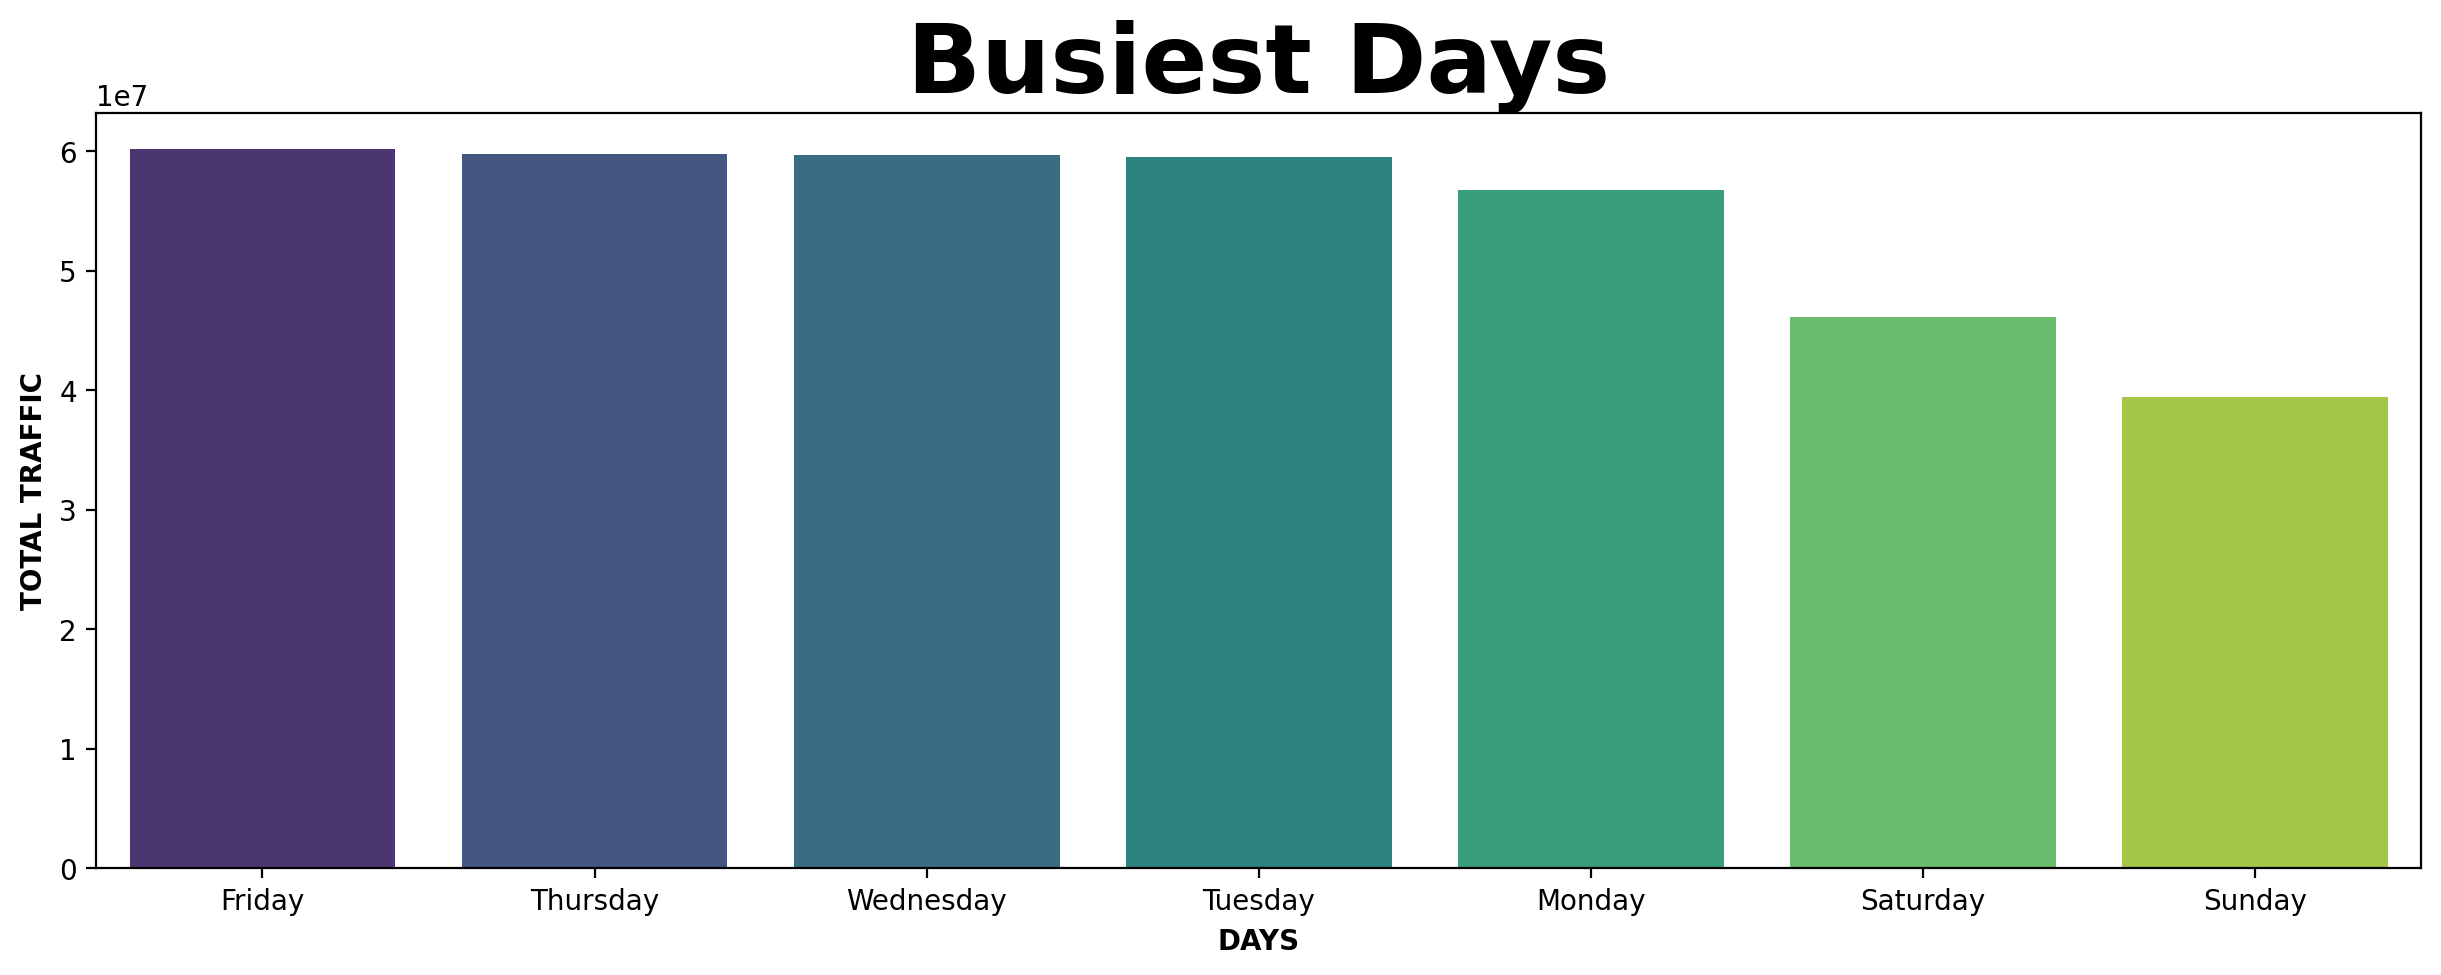

In [46]:
plt.figure(figsize=[15,5], dpi=200)
ax = sns.barplot(x = 'day',y = 'traffic',data = mta_top_days,palette=("viridis"))
plt.title('Busiest Days', weight="bold", fontsize=35)
plt.ylabel('TOTAL TRAFFIC',fontsize=10,fontweight="bold")
plt.xlabel('DAYS',fontsize=10,fontweight="bold")
plt.show()


In [47]:
top_10_stations = [] 
for ind in mta_top_10.index:
    top_10_stations.append(mta_top_10['station'][ind])

In [48]:
mta_top_stations_by_day = mta_entry_exit[mta_entry_exit.station.isin(top_10_stations)]
mta_top_stations_by_day = mta_top_stations_by_day.groupby(['day','station']).sum().sort_values('traffic',ascending=False)
mta_top_stations_by_day = mta_top_stations_by_day.reset_index()

mta_top_stations_by_day

,day,station,entries_diff,exits_diff,traffic
0,Tuesday,34 ST-PENN STA,656594,615924,1272518
1,Thursday,34 ST-PENN STA,645797,623617,1269414
2,Monday,34 ST-PENN STA,659281,602562,1261843
3,Wednesday,34 ST-PENN STA,642313,610259,1252572
4,Friday,34 ST-PENN STA,624999,622521,1247520
...,...,...,...,...,...
65,Thursday,42 ST-PORT AUTH,334724,226589,561313
66,Wednesday,42 ST-PORT AUTH,335169,220845,556014
67,Friday,42 ST-PORT AUTH,325879,227894,553773
68,Sunday,FULTON ST,285656,265812,551468


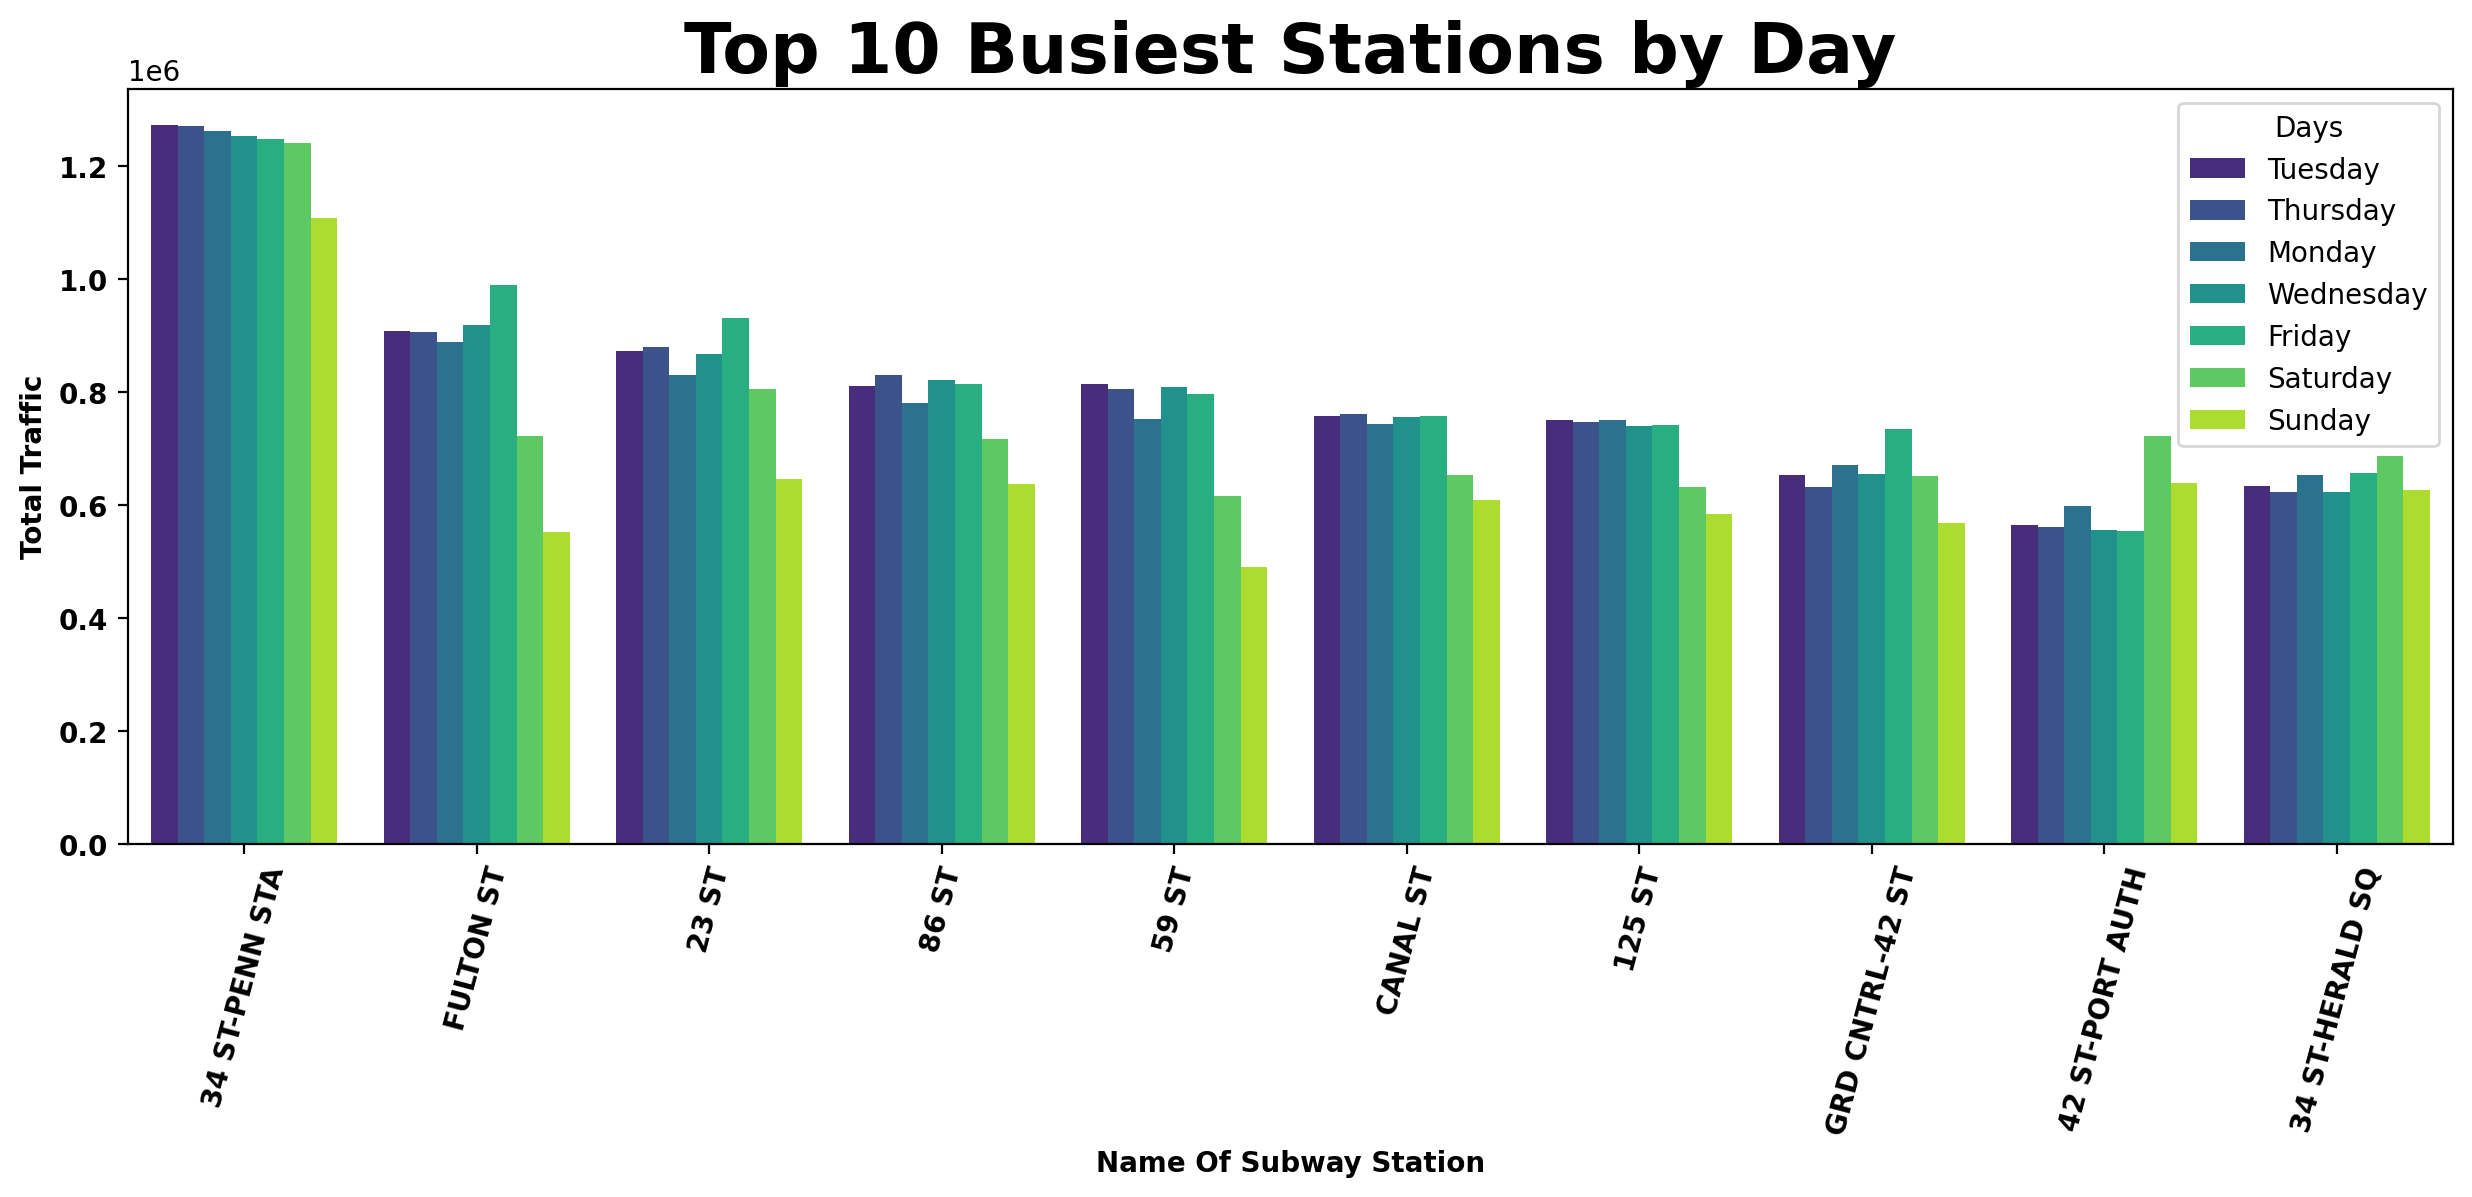

In [49]:
plt.figure(figsize=[15,5], dpi=200)
ax = sns.barplot(x="station", y="traffic", hue="day",data=mta_top_stations_by_day, saturation=1,palette=("viridis"))
plt.title("Top 10 Busiest Stations by Day", weight="bold", fontsize=25)
plt.xlabel("Name Of Subway Station",weight="bold",c="k")
plt.xticks(rotation=75, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.show()

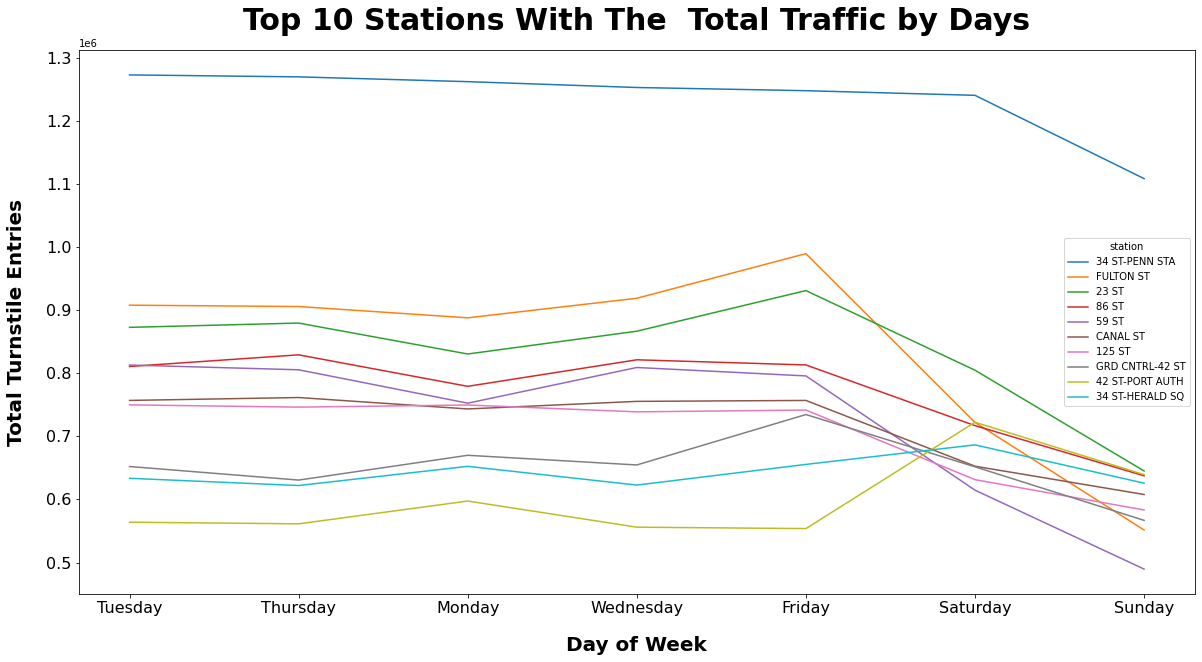

In [50]:
fig, axs = plt.subplots(figsize=[20, 10])

line_weekday_entries = sns.lineplot(x = "day",
                                     y = "traffic",
                                     hue = "station",
                                     data = mta_top_stations_by_day)

line_weekday_entries.set_title("Top 10 Stations With The  Total Traffic by Days",
                             
                             fontsize=30,
                             fontweight='bold',
                             pad=20)

line_weekday_entries.set_ylabel("Total Turnstile Entries", 
                                 
                                 fontsize=20,
                                 fontweight='bold', 
                                 labelpad=20)
line_weekday_entries.set_xlabel("Day of Week", 

                                 fontsize=20,
                                 fontweight='bold',
                                 labelpad=20)
line_weekday_entries.tick_params(labelsize=16)


In [51]:
#Creating Pivot table for heatmap

mta_top10_heatmap = mta_top_stations_by_day.groupby(["station","day"]).traffic.mean().reset_index()

mta_top10_heatmap = mta_top10_heatmap.pivot("day","station","traffic")

mta_top10_heatmap = mta_top10_heatmap.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

mta_top10_heatmap

station,125 ST,23 ST,34 ST-HERALD SQ,34 ST-PENN STA,42 ST-PORT AUTH,59 ST,86 ST,CANAL ST,FULTON ST,GRD CNTRL-42 ST
day,,,,,,,,,,
Monday,749576.0,830357.0,652399.0,1261843.0,597412.0,752457.0,779142.0,743319.0,887692.0,669885.0
Tuesday,749784.0,872591.0,633451.0,1272518.0,563888.0,812893.0,810577.0,756811.0,907718.0,652112.0
Wednesday,738711.0,866489.0,622695.0,1252572.0,556014.0,808985.0,821197.0,755305.0,918669.0,654574.0
Thursday,746169.0,879375.0,621997.0,1269414.0,561313.0,805354.0,829041.0,761398.0,905570.0,630610.0
Friday,741568.0,930842.0,655464.0,1247520.0,553773.0,795635.0,813026.0,756792.0,989365.0,734455.0
Saturday,631277.0,804674.0,686384.0,1240164.0,722261.0,614648.0,716898.0,652578.0,721965.0,651614.0
Sunday,583269.0,645047.0,625753.0,1108211.0,639300.0,489607.0,637358.0,607791.0,551468.0,566811.0


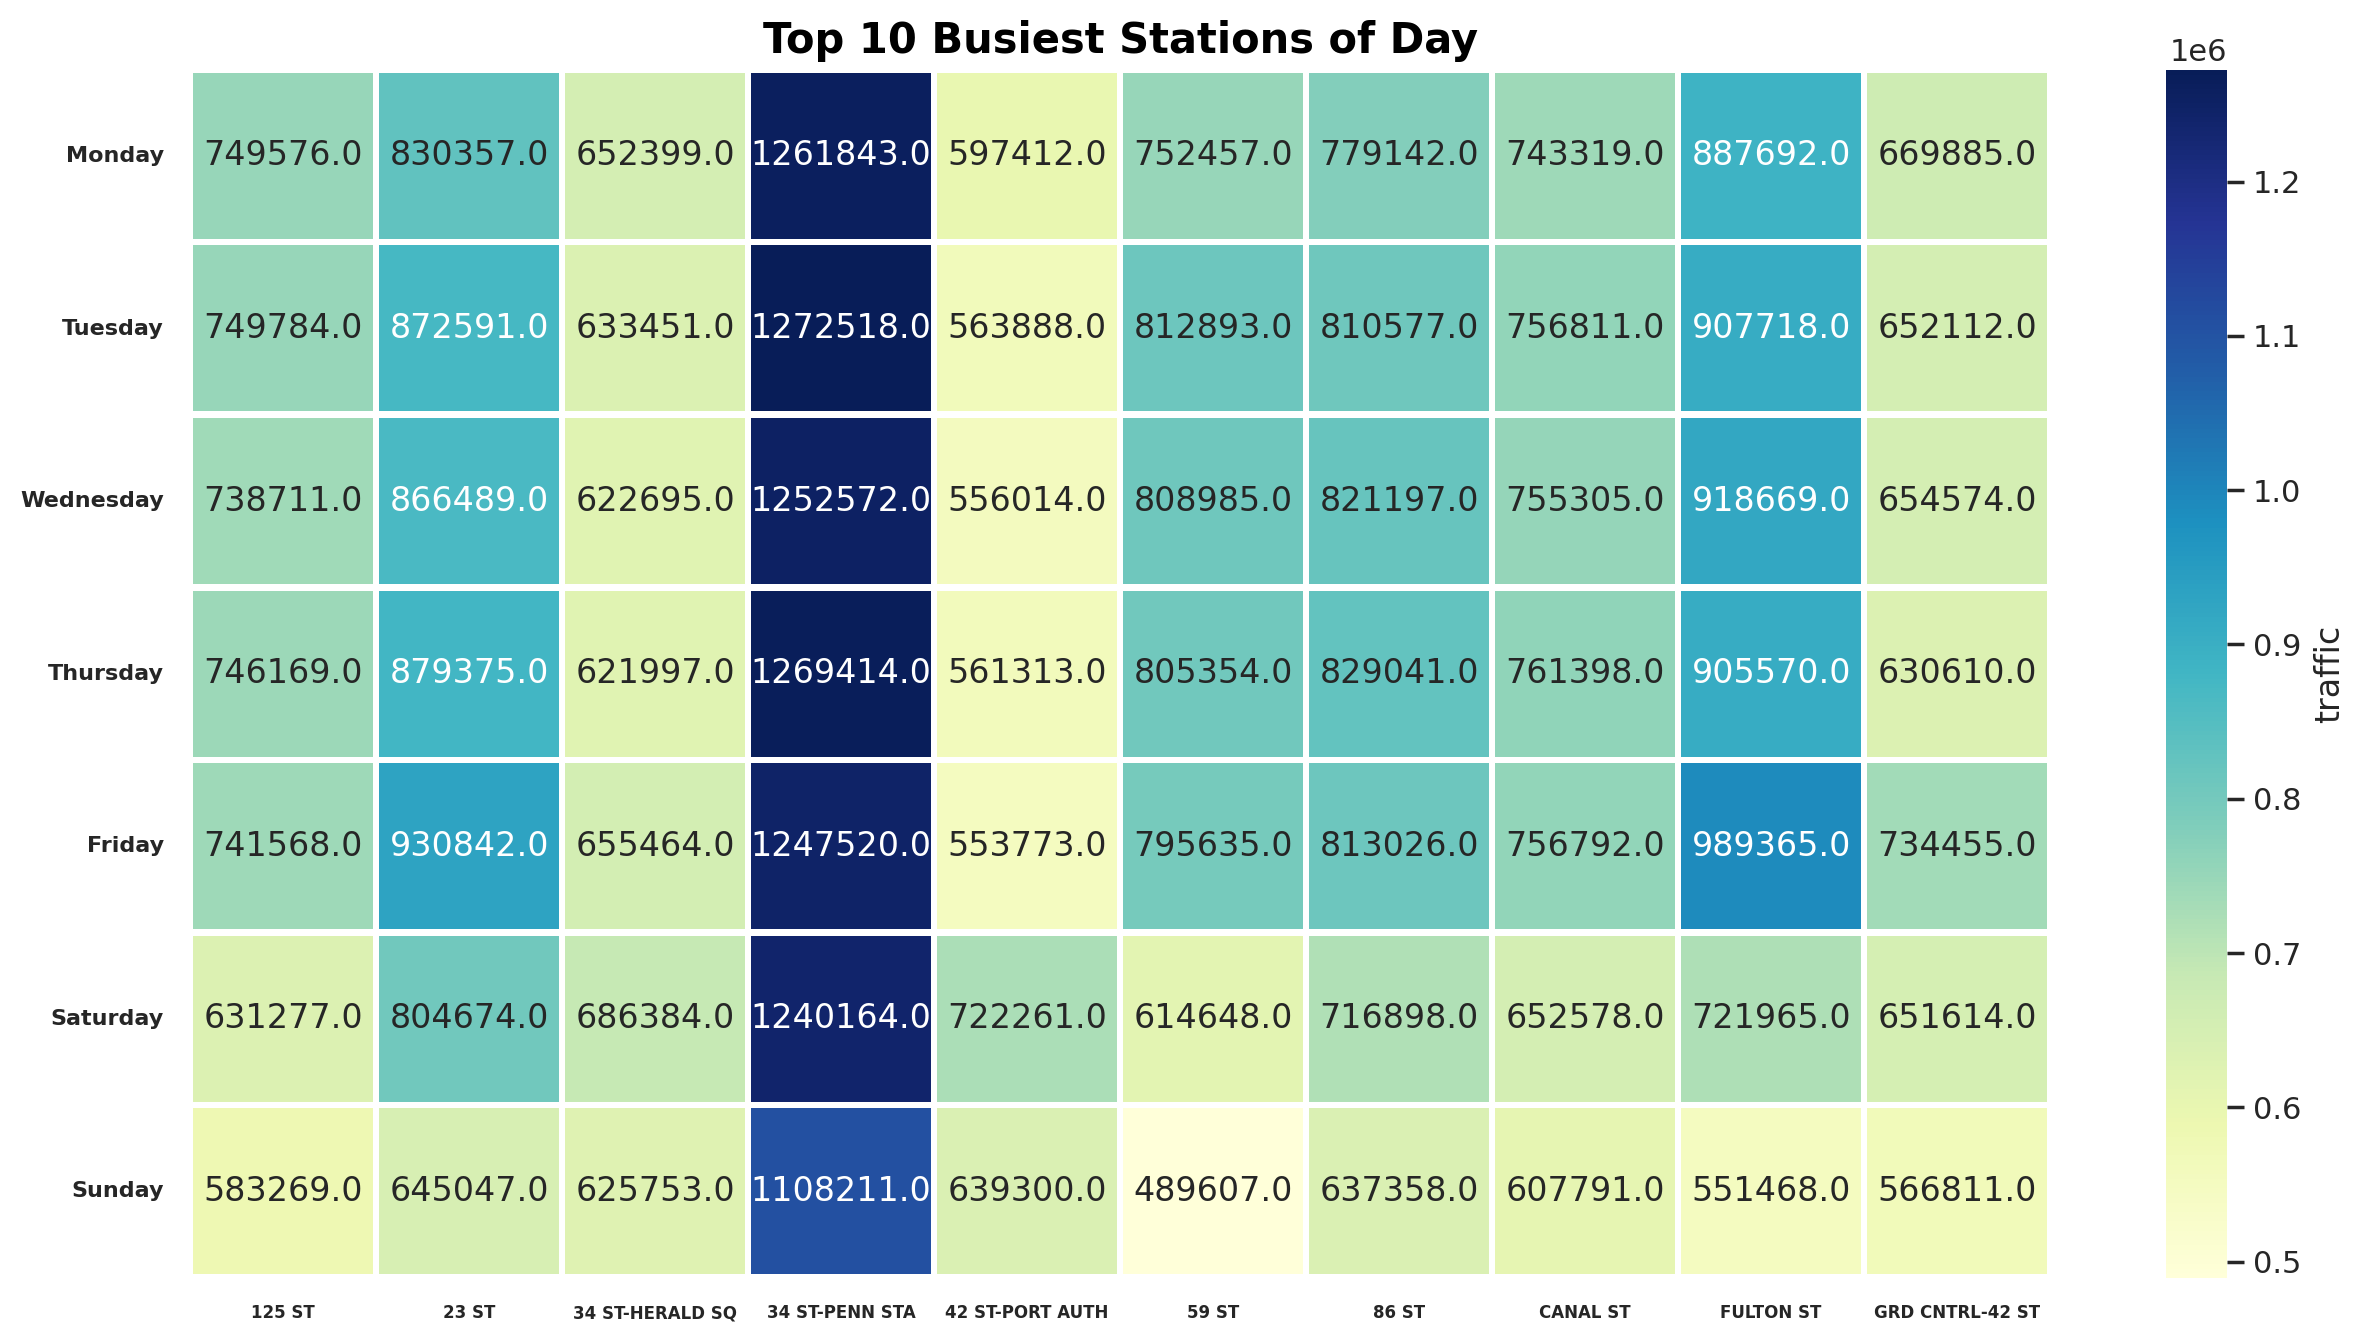

In [52]:
plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top10_heatmap,annot=True,fmt=".1f", linewidths=2, cmap="YlGnBu",cbar_kws={'label': 'traffic'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=8)
plt.xticks(weight="bold",rotation=0,size=6)
plt.title("Top 10 Busiest Stations of Day",weight="bold",c="Black", fontsize=15)
plt.show()

In [53]:
#Calculating busiest time
mta_time = mta.sort_values(["station","turnstile","datetime"]).reset_index()
mta_time_group = mta_time.groupby(["turnstile"])

mta_time["dif_entries"] = mta_time_group["entries"].transform(pd.Series.diff)
mta_time["dif_exits"] = mta_time_group["exits"].transform(pd.Series.diff)

mta_time.head(5)

,index,ca,unit,scp,station,date,time,desc,entries,exits,datetime,yeardate,day,turnstile,day_date,dif_entries,dif_exits
0,29979,H007,R248,00-00-00,1 AV,05/26/2018,00:00:00,REGULAR,13569667,15200381,2018-05-26 00:00:00,2018,Saturday,1 AV-H007-R248-00-00-00,2018-05-26_Saturday,NaN,NaN
1,29980,H007,R248,00-00-00,1 AV,05/26/2018,04:00:00,REGULAR,13569755,15200616,2018-05-26 04:00:00,2018,Saturday,1 AV-H007-R248-00-00-00,2018-05-26_Saturday,88.0,235.0
2,29981,H007,R248,00-00-00,1 AV,05/26/2018,08:00:00,REGULAR,13569834,15200917,2018-05-26 08:00:00,2018,Saturday,1 AV-H007-R248-00-00-00,2018-05-26_Saturday,79.0,301.0
3,29982,H007,R248,00-00-00,1 AV,05/26/2018,12:00:00,REGULAR,13570342,15201709,2018-05-26 12:00:00,2018,Saturday,1 AV-H007-R248-00-00-00,2018-05-26_Saturday,508.0,792.0
4,29983,H007,R248,00-00-00,1 AV,05/26/2018,16:00:00,REGULAR,13571036,15202735,2018-05-26 16:00:00,2018,Saturday,1 AV-H007-R248-00-00-00,2018-05-26_Saturday,694.0,1026.0


In [54]:
#Setting new values (median) for negative and higher than quantile (0.95)

mta_time["dif_entries"] = mta_time["dif_entries"].fillna(0)
mta_time["dif_exits"] = mta_time["dif_exits"].fillna(0)
mta_time['dif_entries'][mta_time['dif_entries'] < 0] = (mta_time["dif_entries"].median())
mta_time['dif_exits'][mta_time['dif_exits'] < 0] = (mta_time["dif_exits"].median())
mta_time['dif_entries'][mta_time['dif_entries'] > (mta_time["dif_entries"].quantile(0.95))] = (mta_time["dif_entries"].median()) 
mta_time['dif_exits'][mta_time['dif_exits'] > (mta_time["dif_exits"].quantile(0.95))] = (mta_time["dif_exits"].median()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

In [55]:
#Calculating TRAFFIC column DIF_ENTRIES + DIF_EXITS
mta_time["traffic"] = mta_time["dif_entries"] + mta_time["dif_exits"]
mta_time.head(5)

,index,ca,unit,scp,station,date,time,desc,entries,exits,datetime,yeardate,day,turnstile,day_date,dif_entries,dif_exits,traffic
0,29979,H007,R248,00-00-00,1 AV,05/26/2018,00:00:00,REGULAR,13569667,15200381,2018-05-26 00:00:00,2018,Saturday,1 AV-H007-R248-00-00-00,2018-05-26_Saturday,0.0,0.0,0.0
1,29980,H007,R248,00-00-00,1 AV,05/26/2018,04:00:00,REGULAR,13569755,15200616,2018-05-26 04:00:00,2018,Saturday,1 AV-H007-R248-00-00-00,2018-05-26_Saturday,88.0,235.0,323.0
2,29981,H007,R248,00-00-00,1 AV,05/26/2018,08:00:00,REGULAR,13569834,15200917,2018-05-26 08:00:00,2018,Saturday,1 AV-H007-R248-00-00-00,2018-05-26_Saturday,79.0,301.0,380.0
3,29982,H007,R248,00-00-00,1 AV,05/26/2018,12:00:00,REGULAR,13570342,15201709,2018-05-26 12:00:00,2018,Saturday,1 AV-H007-R248-00-00-00,2018-05-26_Saturday,30.0,28.0,58.0
4,29983,H007,R248,00-00-00,1 AV,05/26/2018,16:00:00,REGULAR,13571036,15202735,2018-05-26 16:00:00,2018,Saturday,1 AV-H007-R248-00-00-00,2018-05-26_Saturday,30.0,28.0,58.0


In [56]:
mta_time.groupby(["station"]).sum().sort_values("traffic", ascending=False).head(8)


,index,entries,exits,yeardate,dif_entries,dif_exits,traffic
station,,,,,,,
34 ST-PENN STA,6078093317,2949072550736,2936944384682,135870703,5740435.0,4970398.0,10710833.0
23 ST,4603885774,4008870332257,4022008773169,98348124,3771580.0,3427946.0,7199526.0
FULTON ST,5774343915,2895073657832,3023171114318,130932102,3656841.0,3221925.0,6878766.0
125 ST,3456596908,3877777165305,2540563546741,58104575,3342343.0,3074674.0,6417017.0
86 ST,4422529458,1153617388865,1601103610960,80840675,3545908.0,2744423.0,6290331.0
34 ST-HERALD SQ,2623126806,3007489228490,3814995362431,73560194,2991737.0,3115431.0,6107168.0
GRD CNTRL-42 ST,7936946369,1494029832965,1802783111022,100939108,2974348.0,2962550.0,5936898.0
42 ST-PORT AUTH,1788875323,5105970980238,4204827668616,69351664,3302689.0,2460241.0,5762930.0


In [57]:
mta_time_a=mta_time[mta_time["station"]=="34 ST-PENN STA"]
stations_day_time = mta_time_a[['station', 'time', 'day','traffic']]
stations_day_time_group = stations_day_time.groupby(['station','day','time'], as_index=False)
stations_day_time_group = stations_day_time_group[['traffic']].sum()
stations_day_time_group['time'] = pd.to_datetime(stations_day_time_group['time'], format='%H:%M:%S')
rounded_day_time = stations_day_time_group.set_index('time').groupby(['station','day'])
rounded_day_time = rounded_day_time.resample("4H").sum()
rounded_day_time = rounded_day_time.reset_index()
rounded_day_time.head(6)

,station,day,time,traffic
0,34 ST-PENN STA,Friday,1900-01-01 00:00:00,251018.0
1,34 ST-PENN STA,Friday,1900-01-01 04:00:00,46884.0
2,34 ST-PENN STA,Friday,1900-01-01 08:00:00,267942.0
3,34 ST-PENN STA,Friday,1900-01-01 12:00:00,358369.0
4,34 ST-PENN STA,Friday,1900-01-01 16:00:00,394768.0
5,34 ST-PENN STA,Friday,1900-01-01 20:00:00,372134.0


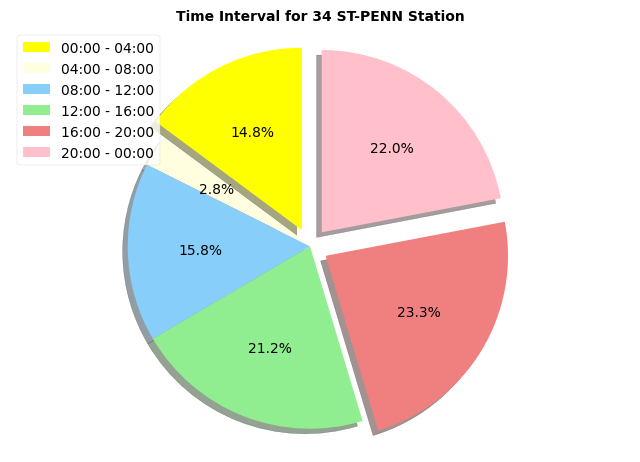

In [58]:
plt.style.use('seaborn-notebook')
fig1, ax1 = plt.subplots()
time = '00:00 - 04:00', '04:00 - 08:00', '08:00 - 12:00', '12:00 - 16:00','16:00 - 20:00','20:00 - 00:00'
traffic = [251018, 46884, 267942, 358369, 394768 ,372134]
colors_list = ['yellow','lightyellow', 'lightskyblue', 'lightgreen','lightcoral', 'pink']
explode = (0.1, 0, 0, 0, 0.1 ,0.1)  
ax1.pie(traffic, explode=explode,  autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colors_list)
plt.title("Time Interval for 34 ST-PENN Station", weight="bold", c="Black", fontsize=10)
plt.axis('equal') 
plt.legend(labels=time, loc='upper left') 
plt.show()



In [59]:
rounded_day_time.head(10).sort_values("traffic", ascending = False)


,station,day,time,traffic
4,34 ST-PENN STA,Friday,1900-01-01 16:00:00,394768.0
5,34 ST-PENN STA,Friday,1900-01-01 20:00:00,372134.0
3,34 ST-PENN STA,Friday,1900-01-01 12:00:00,358369.0
9,34 ST-PENN STA,Monday,1900-01-01 12:00:00,321328.0
2,34 ST-PENN STA,Friday,1900-01-01 08:00:00,267942.0
0,34 ST-PENN STA,Friday,1900-01-01 00:00:00,251018.0
8,34 ST-PENN STA,Monday,1900-01-01 08:00:00,236669.0
6,34 ST-PENN STA,Monday,1900-01-01 00:00:00,192383.0
7,34 ST-PENN STA,Monday,1900-01-01 04:00:00,47575.0
1,34 ST-PENN STA,Friday,1900-01-01 04:00:00,46884.0


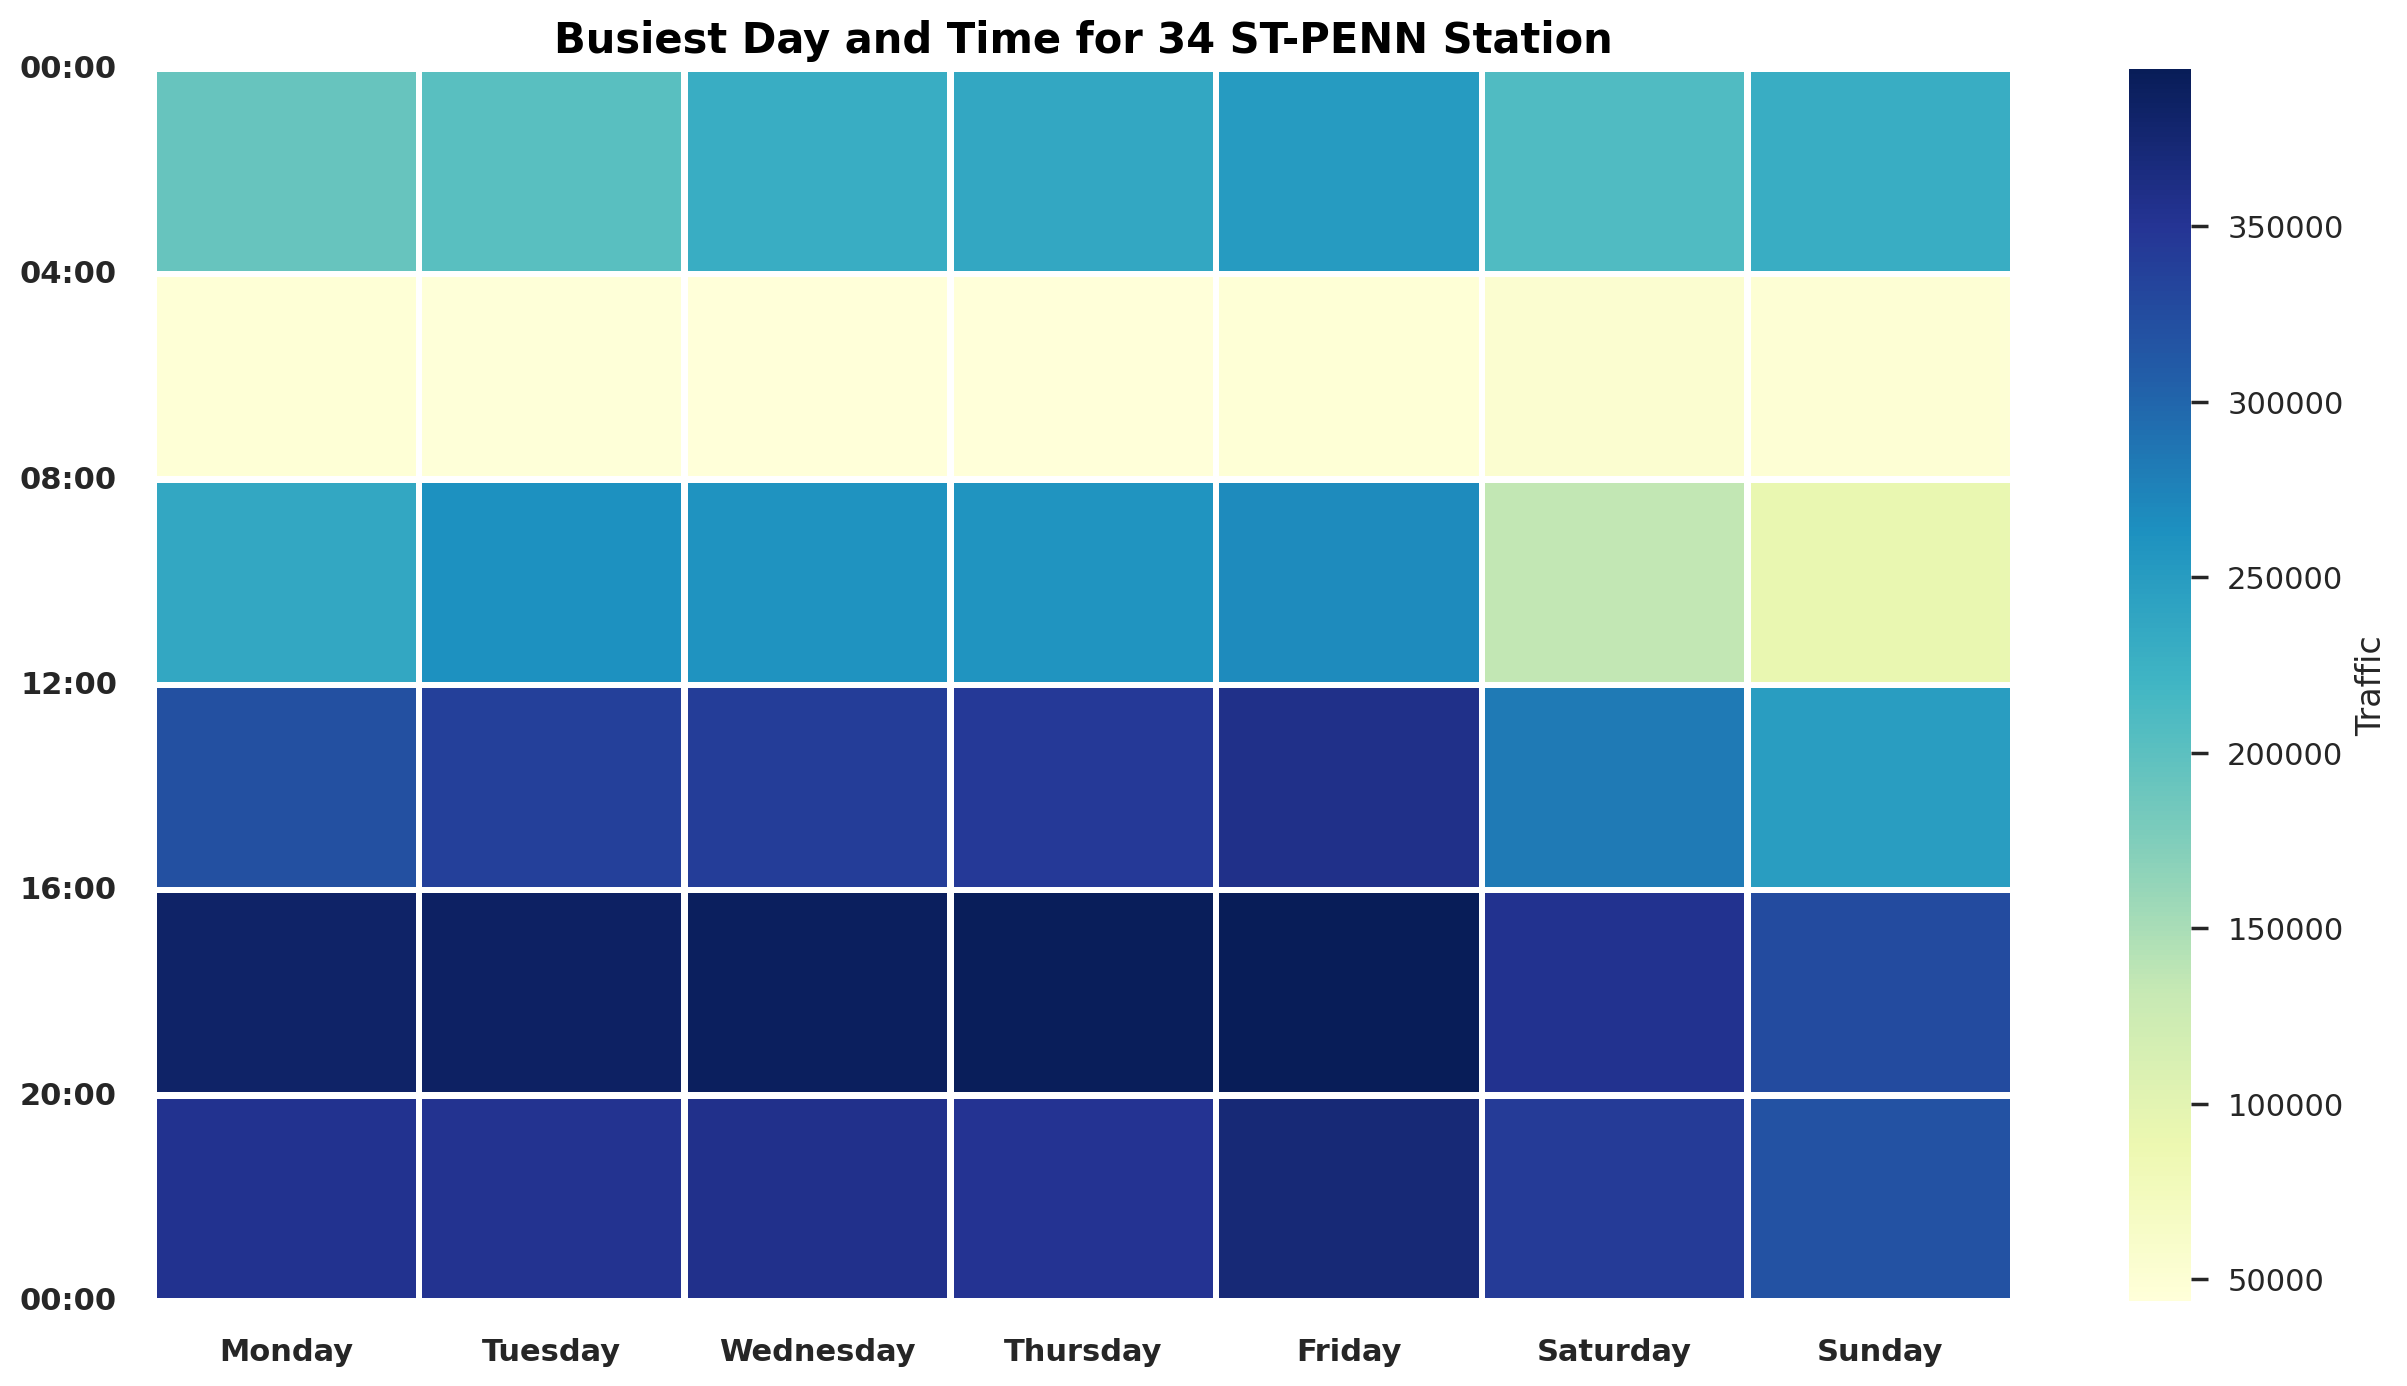

In [60]:
#Creating Pivot table for heatmap

mta_top1_heatmap_detail = rounded_day_time.groupby(["day","time"])
mta_top1_heatmap_detail = mta_top1_heatmap_detail["traffic"].mean().reset_index()

mta_top1_heatmap_detail = rounded_day_time.pivot(index="time", columns="day",values="traffic")
mta_top1_heatmap_detail = mta_top1_heatmap_detail[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

#Heatmap for top7 stations per day

plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top1_heatmap_detail,annot=False, linewidths=2, cmap="YlGnBu",cbar_kws={'label': 'Traffic'})
plt.style.use('seaborn-talk')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0)
plt.yticks([0,1,2,3,4,5,6],["00:00","04:00","08:00","12:00","16:00","20:00","00:00"])
plt.xticks(weight="bold",rotation=0)
plt.title("Busiest Day and Time for 34 ST-PENN Station",weight="bold",c="black", fontsize=15)
ax.xaxis.get_majorticklabels()[2].set_x(-.5)
plt.show()

In [61]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
turnstiles_daily.to_sql("TD_t", con=engine)
mta_data = pd.read_sql('SELECT * FROM TD_t;', engine)
mta_data

,index,ca,unit,scp,station,date,day,time,yeardate,entries,date_prev,entries_prev,daily_entries
0,1,A002,R051,02-00-00,59 ST,05/26/2018,Saturday,04:00:00,2018,6633916,05/26/2018,6633898.0,18.0
1,2,A002,R051,02-00-00,59 ST,05/26/2018,Saturday,08:00:00,2018,6633928,05/26/2018,6633916.0,12.0
2,3,A002,R051,02-00-00,59 ST,05/26/2018,Saturday,12:00:00,2018,6634015,05/26/2018,6633928.0,87.0
3,4,A002,R051,02-00-00,59 ST,05/26/2018,Saturday,16:00:00,2018,6634173,05/26/2018,6634015.0,158.0
4,5,A002,R051,02-00-00,59 ST,05/26/2018,Saturday,20:00:00,2018,6634367,05/26/2018,6634173.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270955,3276071,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/28/2019,Friday,05:00:00,2019,5554,06/28/2019,5554.0,0.0
3270956,3276072,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/28/2019,Friday,09:00:00,2019,5554,06/28/2019,5554.0,0.0
3270957,3276073,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/28/2019,Friday,13:00:00,2019,5554,06/28/2019,5554.0,0.0
3270958,3276074,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/28/2019,Friday,17:00:00,2019,5554,06/28/2019,5554.0,0.0


In [62]:
mta_dat = pd.read_sql('SELECT "ca", sum(daily_entries) FROM TD_t where station= "34 ST-PENN STA"group by "ca" order by sum(daily_entries) DESC ;', engine)
mta_dat.head(10)

,ca,sum(daily_entries)
0,N073,3381314.0
1,R142,3294198.0
2,R138,2996752.0
3,N071,1725974.0
4,N072,1578038.0
5,R135,1466009.0
6,N067,1291841.0
7,N069,660758.0
8,R141,596172.0
9,N070,470476.0


In [63]:
mta_da = pd.read_sql('SELECT "unit", sum(daily_entries) FROM TD_t where station= "34 ST-PENN STA" AND "ca"="R138" order by sum(daily_entries) DESC ;', engine)
mta_da.head

<bound method NDFrame.head of    unit  sum(daily_entries)
0  R293           2996752.0>

In [64]:
mask = ((turnstiles_daily["ca"] == "R138") & 
        (turnstiles_daily["unit"] == "R293") &
(turnstiles_daily["station"] == "34 ST-PENN STA"))

mask_table=turnstiles_daily[mask]
mask_table

,ca,unit,scp,station,date,day,time,yeardate,entries,date_prev,entries_prev,daily_entries
2169608,R138,R293,00-00-00,34 ST-PENN STA,05/26/2018,Saturday,06:00:00,2018,8439889,05/26/2018,8439878.0,11.0
2169609,R138,R293,00-00-00,34 ST-PENN STA,05/26/2018,Saturday,10:00:00,2018,8440153,05/26/2018,8439889.0,264.0
2169610,R138,R293,00-00-00,34 ST-PENN STA,05/26/2018,Saturday,14:00:00,2018,8440787,05/26/2018,8440153.0,634.0
2169611,R138,R293,00-00-00,34 ST-PENN STA,05/26/2018,Saturday,18:00:00,2018,8441321,05/26/2018,8440787.0,534.0
2169612,R138,R293,00-00-00,34 ST-PENN STA,05/26/2018,Saturday,22:00:00,2018,8441848,05/26/2018,8441321.0,527.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2181179,R138,R293,00-06-00,34 ST-PENN STA,06/28/2019,Friday,06:00:00,2019,7221582,06/28/2019,7221565.0,17.0
2181180,R138,R293,00-06-00,34 ST-PENN STA,06/28/2019,Friday,10:00:00,2019,7221816,06/28/2019,7221582.0,234.0
2181181,R138,R293,00-06-00,34 ST-PENN STA,06/28/2019,Friday,14:00:00,2019,7222353,06/28/2019,7221816.0,537.0
2181182,R138,R293,00-06-00,34 ST-PENN STA,06/28/2019,Friday,18:00:00,2019,7223158,06/28/2019,7222353.0,805.0


In [65]:
mask_table.to_sql("mask_tab", con=engine)

In [66]:
mta_evn = pd.read_sql('SELECT time,daily_entries FROM mask_tab where time BETWEEN "16:00:00" AND "23:59:00" order by daily_entries Desc;', engine)

AVG_EVINING_DAILY_ENTRIES=mta_evn["daily_entries"].mean()
AVG_EVINING_DAILY_ENTRIES

245.2360638576289

In [67]:
mta_mor = pd.read_sql('SELECT time,daily_entries FROM mask_tab where time BETWEEN "06:00:00" AND "15:00:00" order by daily_entries Desc;', engine)

AVG_MORNING_DAILY_ENTRIES=mta_mor["daily_entries"].mean()
AVG_MORNING_DAILY_ENTRIES

256.85287081339715

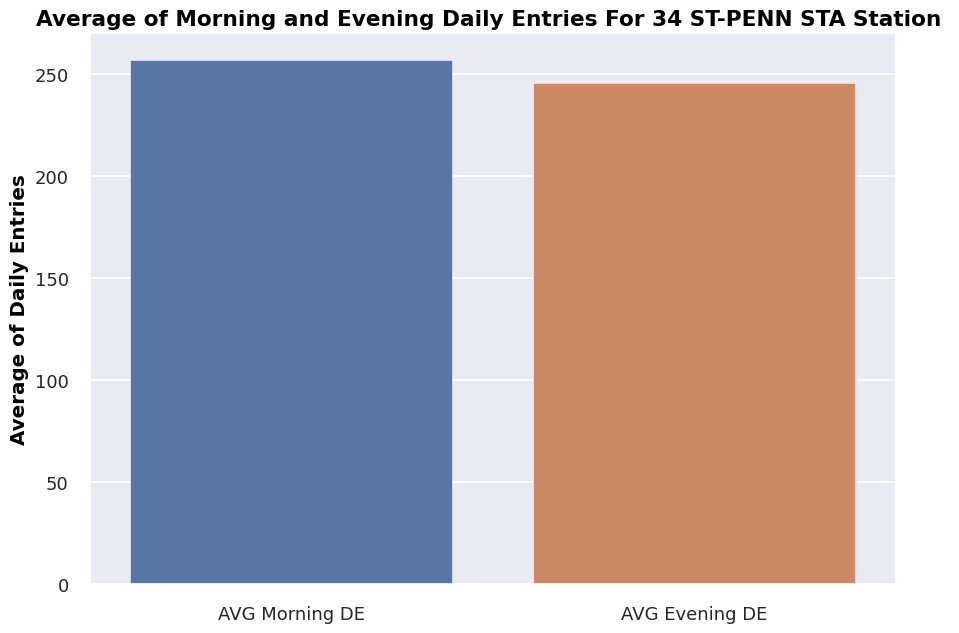

In [68]:
x_list=['AVG Morning DE',"AVG Evening DE"]
y_list=[AVG_MORNING_DAILY_ENTRIES,AVG_EVINING_DAILY_ENTRIES]
sns.barplot(x =x_list,y=y_list);
plt.title("Average of Morning and Evening Daily Entries For 34 ST-PENN STA Station ",weight="bold",c="black")
plt.ylabel("Average of Daily Entries",weight="bold",c="black");


#in 34 ST-PENN STA Station of Average of Morning and Evening Daily Entries


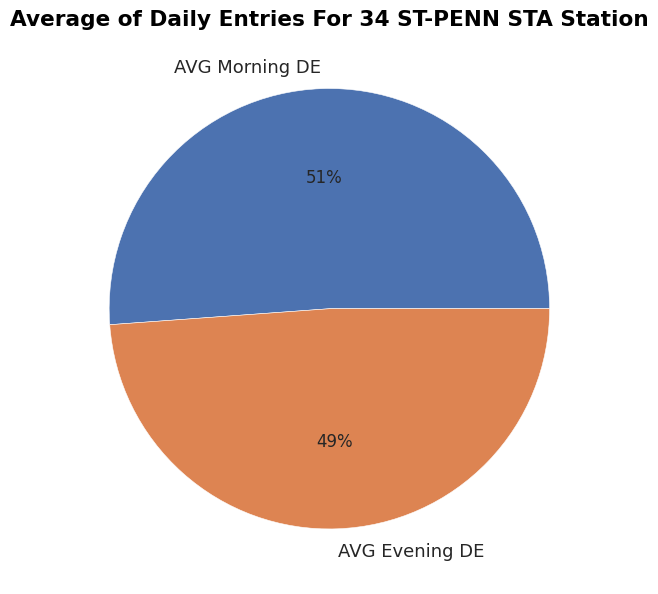

In [69]:
colors = sns.color_palette()
plt.pie(y_list, labels = x_list, colors = colors, autopct='%.0f%%')
plt.title("Average of Daily Entries For 34 ST-PENN STA Station",weight="bold",c="black")
plt.show()